<a href="https://colab.research.google.com/github/jcleary0/video-games-text-mining/blob/main/final_project_group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Prep
- Due to the size of the file, use the higher ram (the default session only has about ~12gb) and then file uses about 11gb.
- is more data prep need?
  - getting rid of blank reviews? (not doing that currently)

In [ ]:
import json
import pandas as pd
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mount, can do a shareable link if needed
file = "/content/drive/MyDrive/INFO585/Final_Project/Video_Games.jsonl"

os.path.exists(file)

True

In [ ]:
df = pd.read_json(file, lines=True)

In [ ]:
#logan- i used this file, the above one kept crashing my session
file_path = "/content/drive/MyDrive/INFO585/Final_Project/Video_Games.jsonl.gz"

chunks = pd.read_json(
    file_path,
    lines=True,
    compression='gzip',
    chunksize=100000  # adjust if needed
)

df_list = []
for chunk in chunks:
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,[],B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-12-17 06:33:24.795,0,True
1,5,Good. A bit slow,Nostalgic fun. A bit slow. I hope they don’t...,[],B00ZS80PC2,B07SRWRH5D,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-04-16 15:31:54.941,1,False
2,5,... an order for my kids & they have really en...,This was an order for my kids & they have real...,[],B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,2017-03-30 12:37:11.000,0,True
3,5,Great alt to pro controller,"These work great, They use batteries which is ...",[],B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2019-12-29 16:40:34.017,0,True
4,5,solid product,I would recommend to anyone looking to add jus...,[],B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2015-03-29 01:18:52.000,0,True


In [ ]:
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,[],B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-12-17 06:33:24.795,0,True
1,5,Good. A bit slow,Nostalgic fun. A bit slow. I hope they don’t...,[],B00ZS80PC2,B07SRWRH5D,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-04-16 15:31:54.941,1,False
2,5,... an order for my kids & they have really en...,This was an order for my kids & they have real...,[],B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,2017-03-30 12:37:11.000,0,True
3,5,Great alt to pro controller,"These work great, They use batteries which is ...",[],B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2019-12-29 16:40:34.017,0,True
4,5,solid product,I would recommend to anyone looking to add jus...,[],B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2015-03-29 01:18:52.000,0,True
...,...,...,...,...,...,...,...,...,...,...
4624610,5,You Need This Mouse,This mouse is awesome! It's very light in the ...,[],B07GCKQD77,B0C89J78ZW,AEGJO3XG3JGBVIJW64SDJ6BIYWHQ,2023-09-10 03:12:18.121,0,True
4624611,5,Great product for the price,nothing!,[],B089F1BD4W,B089F1BD4W,AHTYCU6NSHJ4BY7R2YNDIDGUXS6Q,2020-09-23 12:24:51.023,0,True
4624612,5,Great budget headset.,My daughter loves the headset for playing Fort...,[],B01H6GUCCQ,B0BN942894,AF4KDWDGCJSUEB7JESQZ6ZWD2LNA,2020-03-22 14:39:59.168,0,True
4624613,1,Does not fit controler,Literally doesn’t freaking fit.,[],B09SM83KRP,B09SM83KRP,AG3BHCQJCY3MPNP3UKVAENSGQM2A,2022-10-25 09:31:42.530,1,True


In [ ]:
df_text = df[['rating','text','asin']] # the only columns we need, currently including asin

In [ ]:
df_text.head(10)

,rating,text,asin
0,4,I’m playing on ps5 and it’s interesting. It’s...,B07DJWBYKP
1,5,Nostalgic fun. A bit slow. I hope they don’t...,B00ZS80PC2
2,5,This was an order for my kids & they have real...,B01FEHJYUU
3,5,"These work great, They use batteries which is ...",B07GXJHRVK
4,5,I would recommend to anyone looking to add jus...,B00HUWA45W
5,3,love all the amazing colors but the black is r...,B016Y2BVKA
6,5,Instant delivery!,B004RMK57U
7,5,you should probably get these. you'll journal ...,B07N85FY1G
8,5,*it fits TWO wired Retro-bit 6 button controll...,B08L6782X9
9,1,Sony and Amazon are collaborating in an Auto-r...,B017V6YVDC


In [ ]:
df_small = df_text.sample(n=200, random_state=42) # small

### Document Similarity

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = cv_tfidf.fit_transform(df_small['text'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=cv_tfidf.get_feature_names_out())
df_tfidf

,00,000,0ghz,10,100,1000,100mps,1024mb,10ft,11,...,years,yep,yes,younger,youtube,yrs,zelda,zone,zoomed,zowie
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.285162,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.048048,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.088992,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
#Cosine Similiarity
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

pairs = list(combinations(range(len(df_small)), 2))
corpus = df_small["text"].tolist()

X = X_tfidf  # rename for readability

combos = [(corpus[a], corpus[b]) for (a, b) in pairs]

results = [
    cosine_similarity(X[a].toarray(), X[b].toarray())[0][0]
    for (a, b) in pairs
]

sorted_pairs = sorted(zip(results, combos), reverse=True)

sorted_pairs[:5] # showing top 5 pairs

[(np.float64(1.0), ('very good.', 'Good')),
 (np.float64(1.0), ('very good.', 'Good')),
 (np.float64(1.0), ('very good.', 'Good')),
 (np.float64(1.0), ('ok', 'ok')),
 (np.float64(1.0), ('Very good', 'very good.'))]

When applied to very short texts, cosine similarity with TF-IDF tends to highlight exact word overlap rather than deeper semantic similarity. As seen in the results, phrases such as ‘very good’ and ‘Good’ achieve a similarity score of 1.0 due to identical or near-identical token representations, limiting the usefulness of this approach for nuanced comparison.

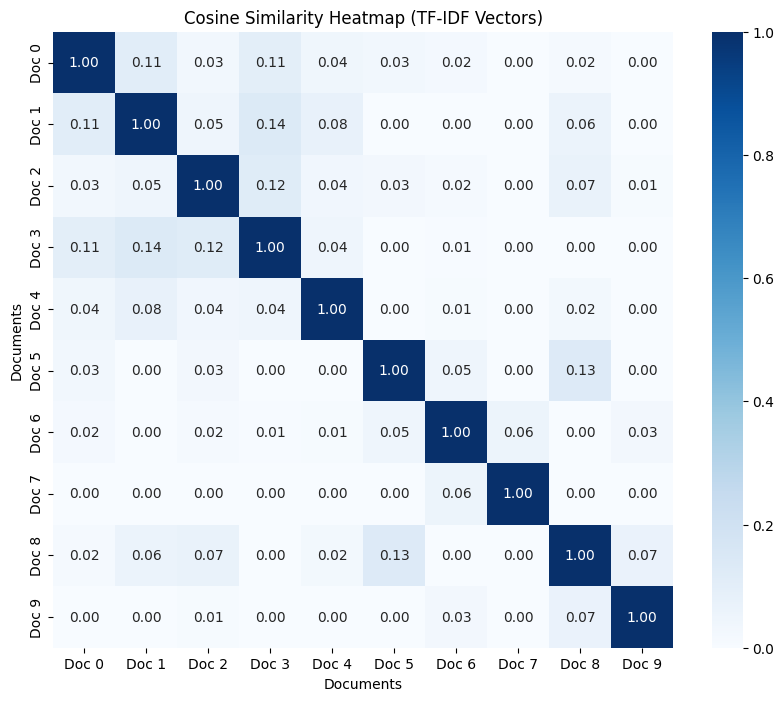

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_size = 10
similarity_matrix = cosine_similarity(X[:subset_size])

labels = [f"Doc {i}" for i in range(subset_size)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Cosine Similarity Heatmap (TF-IDF Vectors)")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()



Most documents share very little vocabulary

TF-IDF representations are sparse

These texts are largely lexically distinct

### Document Clustering

#### K-Means

In [ ]:
#k-means
from typing import Text
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

#random sample of 2000, not sure if were suppose to be using the whole dataset or sample it
df_sample = df_text.sample(n=2000,random_state=42).reset_index(drop=True)
rating = df_sample['rating'].astype(int).to_numpy()

In [ ]:
# tf-idf for sample
vectorize_clustering = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorize_clustering.fit_transform(df_sample['text'])

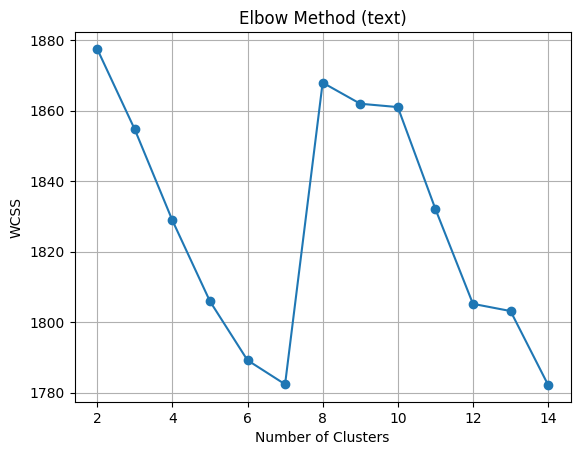

In [ ]:
# elbow method for text
wcss = []
k_range = range(2,15)
for k in k_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_text)
  wcss.append(km.inertia_)
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method (text)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
#After using the elbow method, k would be either 6 or 7
k=6

In [ ]:
kmeans_text = KMeans(n_clusters=k, random_state=42).fit(X_text)
kmeans_text_labels = kmeans_text.labels_

pca_text = PCA(n_components=2)
X_text_pca = pca_text.fit_transform(X_text.toarray())

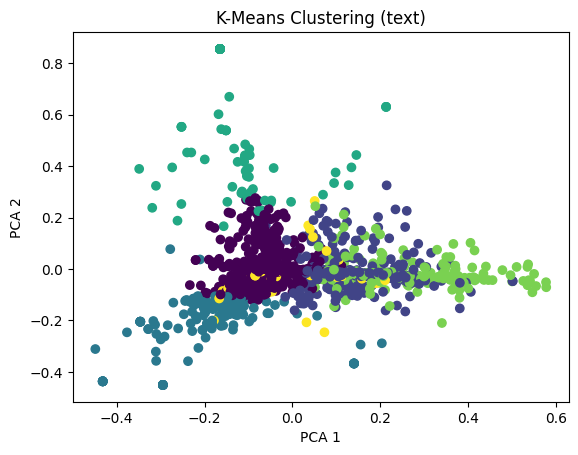

In [ ]:
# KMeans Results
plt.figure()
plt.scatter(X_text_pca[:,0], X_text_pca[:,1], c=kmeans_text_rating)
plt.title("K-Means Clustering (text)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#### Agglomerative

In [ ]:
# Agglomerative
agglo_text = AgglomerativeClustering(n_clusters=k).fit(X_text.toarray())
agglo_text_labels = agglo_text.labels_

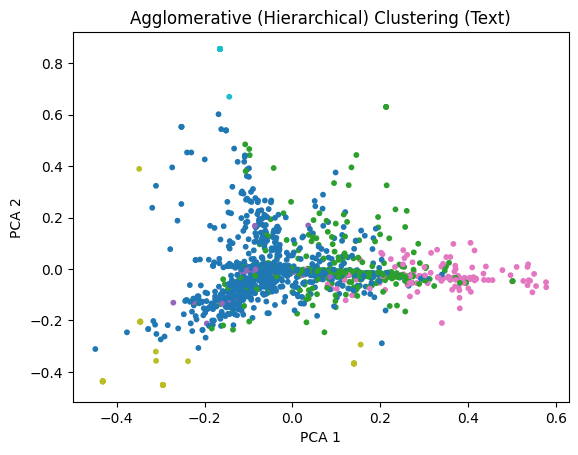

In [ ]:
plt.figure()
plt.scatter(X_text_pca[:, 0], X_text_pca[:, 1], c=agglo_text_labels, cmap='tab10', s=10)
plt.title("Agglomerative (Hierarchical) Clustering (Text)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Text Classification

##Preprocess

In [ ]:
df_tc = df_text.copy()

df_sample = df_tc.sample(40000, random_state=42)

df_sample = df_sample[['text', 'rating']].dropna()

df_sample['label'] = df_sample['rating'].apply(lambda x: 1 if x >= 4 else 0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_sample['text']
y = df_sample['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(
    max_features=50000,
    max_df=0.8,
    min_df=5,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

##SVM

In [ ]:
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      2061
           1       0.91      0.95      0.93      5939

    accuracy                           0.89      8000
   macro avg       0.87      0.84      0.85      8000
weighted avg       0.89      0.89      0.89      8000



##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.41      0.57      2061
           1       0.83      0.99      0.90      5939

    accuracy                           0.84      8000
   macro avg       0.89      0.70      0.74      8000
weighted avg       0.86      0.84      0.82      8000



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tfidf, y_train)
y_pred_tree = tree_model.predict(X_test_tfidf)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
               precision    recall  f1-score   support

           0       0.61      0.58      0.60      2061
           1       0.86      0.87      0.86      5939

    accuracy                           0.80      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.79      0.80      0.79      8000



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.43      0.58      2061
           1       0.83      0.99      0.90      5939

    accuracy                           0.84      8000
   macro avg       0.87      0.71      0.74      8000
weighted avg       0.85      0.84      0.82      8000



##ADAboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ab_model.fit(X_train_tfidf, y_train)
y_pred_ab = ab_model.predict(X_test_tfidf)
print("AdaBoost:\n", classification_report(y_test, y_pred_ab))

AdaBoost:
               precision    recall  f1-score   support

           0       0.65      0.33      0.43      2061
           1       0.80      0.94      0.86      5939

    accuracy                           0.78      8000
   macro avg       0.72      0.63      0.65      8000
weighted avg       0.76      0.78      0.75      8000



##Text Classification Insights

SVM had the best performance overall holding a 0.89 weighted average across precision, recall and f1-score as well as a 0.89 in accuracy. This was the only model that performed consistently well across both class 0 and class 1. Many of the other models such as AdaBoost and Random Forest performed exceptionally at predicting class 1 however faltered in class 0.

# Deep Learning-LSTM

In [ ]:
!pip install tensorflow numpy pandas scikit-learn

df_dl = df_text.copy()

df_small = df_dl.sample(40000, random_state=42)

df_small = df_small[['text', 'rating']].dropna()

df_small['label'] = df_small['rating'].apply(lambda x: 1 if x >= 4 else 0)

df_small = df_small[['text', 'label']]
df_small.head()



,text,label
1112677,The origional LOZ was and still is my favorite...,1
612761,2K has brought it back with this edition. I ha...,1
1402617,It is very important to note that this device ...,1
3777127,Let me be the first to say that this is not a ...,1
1549429,"I know what it is now, IT'S ALMOST IMPOSSIBLE ...",0


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_small['text'], df_small['label'],
    test_size=0.2,
    random_state=42
)

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=128,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7468 - loss: 0.5800 - val_accuracy: 0.7453 - val_loss: 0.5657
Epoch 2/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.7484 - loss: 0.5655 - val_accuracy: 0.7455 - val_loss: 0.5648
Epoch 3/3
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7499 - loss: 0.5661 - val_accuracy: 0.7469 - val_loss: 0.5656


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (128, 200, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (128, 128)             │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (128, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (128, 64)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (128, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,099,717 (30.90 MB)

 Trainable params: 2,699,905 (10.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,399,812 (20.60 MB)

In [ ]:
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {acc:.4f}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7392 - loss: 0.5744
Test Accuracy: 0.7434


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_probs = model.predict(X_test_pad)

y_pred_lstm = (y_pred_probs > 0.5).astype(int)

print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))

print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Accuracy: 0.743375
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.02      0.05      2061
           1       0.75      0.99      0.85      5939

    accuracy                           0.74      8000
   macro avg       0.65      0.51      0.45      8000
weighted avg       0.69      0.74      0.64      8000



Re-done with Class Weights

In [ ]:
df_small['label'].value_counts(normalize=True)


,proportion
label,
1,0.745925
0,0.254075


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: np.float64(1.9748210318439892), 1: np.float64(0.669512093062181)}

In [ ]:
from tensorflow.keras.layers import (GlobalMaxPooling1D)

model = Sequential([
    Embedding(
        input_dim=max_words,
        output_dim=128,
        input_length=max_len
    ),

    Bidirectional(
        LSTM(64, return_sequences=True)
    ),

    GlobalMaxPooling1D(),

    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc")
    ]
)
history = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.6413 - auc: 0.7609 - loss: 0.5700 - val_accuracy: 0.8514 - val_auc: 0.9298 - val_loss: 0.3408
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8884 - auc: 0.9519 - loss: 0.2788 - val_accuracy: 0.8502 - val_auc: 0.9306 - val_loss: 0.3308
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9229 - auc: 0.9726 - loss: 0.2100 - val_accuracy: 0.8589 - val_auc: 0.9301 - val_loss: 0.3495
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9433 - auc: 0.9843 - loss: 0.1543 - val_accuracy: 0.8559 - val_auc: 0.9233 - val_loss: 0.3709
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9552 - auc: 0.9898 - loss: 0.1231 - val_accuracy: 0.8483 - val_auc: 0.9110 - val_loss: 0.4349
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9661 - auc: 0.9934 - loss: 0.0967 - val_accuracy: 0.8522 - val_auc: 0.9064 - val_loss: 0.4541
Epoch 7/10
200/200 ━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_probs = model.predict(X_test_pad).ravel()
y_pred = (y_pred_probs >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.86125
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      2061
           1       0.91      0.90      0.91      5939

    accuracy                           0.86      8000
   macro avg       0.82      0.83      0.82      8000
weighted avg       0.86      0.86      0.86      8000



##Deep Learning Insights

The above deep learning model performed decently in predicting class 1 but was very poor in predicting class 0, the worst by a significant margin. It does have a solid accuracy of 0.74 but overall performs much worse than the text classification models.

After re-working the model, there were significant improvements across the board particularly in predicting class 0. The addition of class weights had a major impact in balancing the analysis.